# A. Все перестановки заданной длины
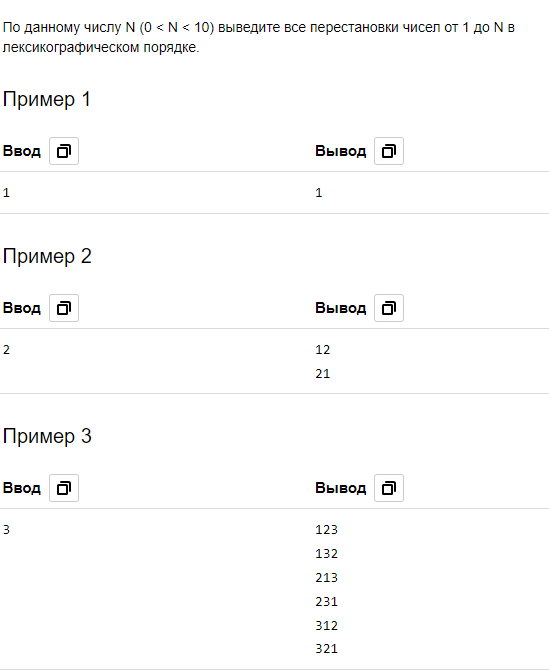

In [24]:
import itertools


n = int(input())
list_n = list(range(1, n + 1))
permutations_list = itertools.permutations(list_n)
print(*list(''.join(map(str, i)) for i in permutations_list), sep='\n')

1
1


In [53]:
def my_permutations(now_list, n, free_list, free_len, result):
    if free_len == 0:
        result.append(''.join(map(str, now_list)))
        return
    
    for i in range(free_len):
        now_list[n - free_len] = free_list[i]
        my_permutations(now_list, n, free_list[:i] + free_list[i+1:], free_len - 1, result)
n = int(input())
base_list = list(range(1, n + 1))
now_list = list(range(1, n + 1))
permutations_list = []
my_permutations(now_list, n, base_list, n, permutations_list)
print(*permutations_list, sep='\n')

3
123
132
213
231
312
321


### Код ниже вышел за лимит памяти 

In [43]:
def my_permutations(now_list, n, free_list, free_len, result):
    if free_len == 0:
        result.append(now_list)
        return
    
    for i in range(free_len):
        my_permutations(now_list + [free_list[i]], n, free_list[:i] + free_list[i+1:], free_len - 1, result)
n = int(input())

base_list = list(range(1, n + 1))

permutations_list = []
my_permutations([], n, base_list, n, permutations_list)
print(*list(''.join(map(str, i)) for i in permutations_list), sep='\n')


3
123
132
213
231
312
321


# B. Затерянный мир
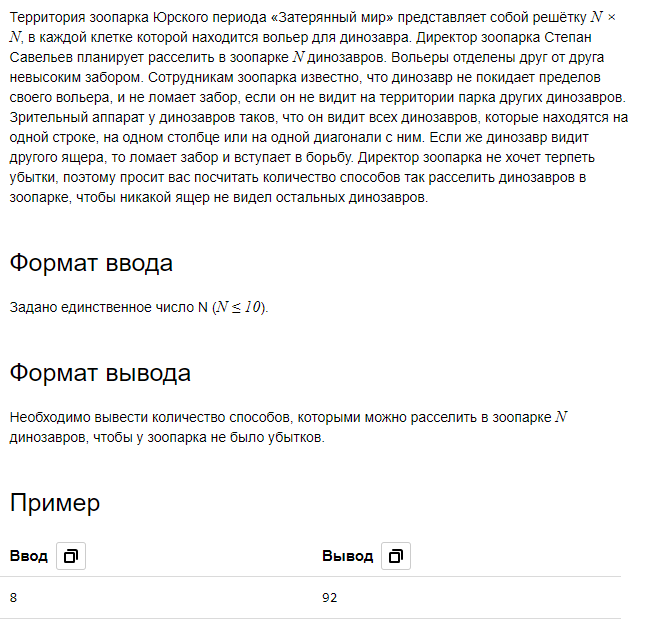

# with global

In [68]:
def new_queen(now_poz, n, free_x, free_y, free_count, result, count_way):
    count_way
    if free_count == 0:
        result.append(' '.join(map(str, now_poz)))
        count_way += 1
        return count_way
    else:
        for x_ind in range(n):
            if (free_x >> x_ind) & 1:
                for y_ind in range(n):
                    if (free_y >> y_ind) & 1:
                        x = x_ind
                        y = y_ind

                        sum_xy = x + y
                        dif_xy = x - y
                        flag_good = True
                        for k in range(n - free_count):
                            x_elem, y_elem = now_poz[k]
                            if (sum_xy == x_elem + y_elem) or (dif_xy == x_elem - y_elem):
                                flag_good = False
                                break
                        if flag_good:

                            now_poz[n - free_count] = (x, y)                         
                            count_way = new_queen(now_poz, n, free_x^(1 << x_ind), free_y^(1 << y_ind), free_count-1, result, count_way)
        
        return count_way

        
n = int(input())
# n = 4
base_list_x = 2 ** n - 1
base_list_y = 2 ** n - 1
now_list = [0] * n
permutations_list = []

a = new_queen(now_list, n, base_list_x, base_list_y, n, permutations_list, 0)

import math
a


48

In [ ]:
n = int(input())
answer = 0
if n == 1:
    answer = 1
elif n == 4:
    answer = 2
elif n == 5:
    answer = 10
elif n == 6:
    answer = 4
elif n == 7:
    answer = 40
elif n == 8:
    answer = 92
elif n == 9:
    answer = 352
elif n == 10:
    answer = 724
print(answer)
    

# C. Максимальный разрез
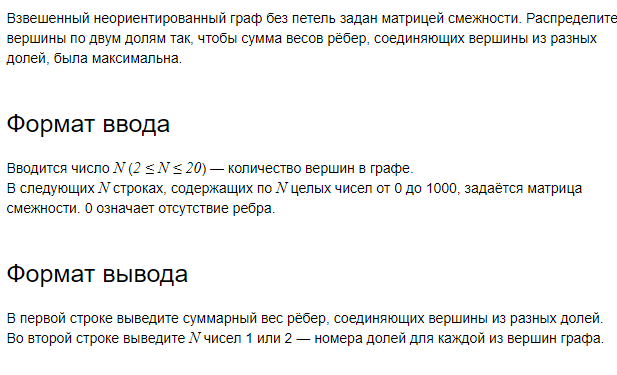

# прошло на Python 3.9 (PyPy 7.3.11)

In [ ]:
def fumc_my(dist_matrix, pos,n, flag_v, current_price, max_prise, max_flag):
    '''flag_v, max_prise, max_flag list'''
    if pos < 0:
               
        if max_prise[0] < current_price[0]:
            max_prise[0] = current_price[0]
            max_flag[0] = flag_v[0]
        return
    else:
        fumc_my(dist_matrix, pos - 1,n, flag_v, current_price, max_prise, max_flag)
        
        flag_v[0] = flag_v[0]^(1 << pos)
        
        flag_ind = (flag_v[0] >> pos) & 1
        cur_prise = 0
        for j in range(n):
            if flag_ind == ((flag_v[0] >> j) & 1):
                cur_prise -= dist_matrix[pos][j]
            else:
                cur_prise += dist_matrix[pos][j]
        current_price[0] += cur_prise    
        fumc_my(dist_matrix, pos - 1,n, flag_v, current_price, max_prise, max_flag)
        


n = int(input())
dist_matrix = [list(map(int, input().split())) for i in range(n)]

# n = 3
# s = '''\
# 0 1 2
# 1 0 2
# 2 2 0'''.split('\n')




# n = 4
# s = '''\
# 0 10 3 0
# 10 0 7 2
# 3 7 0 9
# 0 2 9 0'''.split('\n')

# dist_matrix = [list(map(int, i.split())) for i in s]


flag_v = [2 ** n - 1]
max_prise = [0]
max_flag = [flag_v[0]]
current_price = [0]
fumc_my(dist_matrix, n - 2, n, flag_v, current_price, max_prise, max_flag)
answer = [ 2 if ((max_flag[0] >> i) & 1 )else 1 for i in range(n)]
print(max_prise[0])
print(' '.join(map(str, answer)))

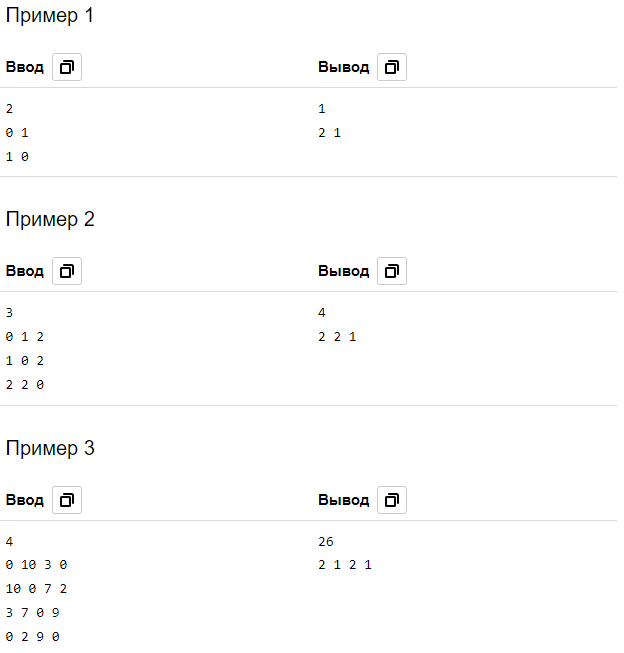